In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [195]:
#importing data
train_DF = pd.read_csv('train.csv')
test_DF = pd.read_csv('test.csv')
train_DF.head(3)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul


In [196]:
indexes = test_DF['id']
train_DF.drop(['id'], axis = 1, inplace = True)
test_DF.drop(['id'], axis = 1, inplace = True)

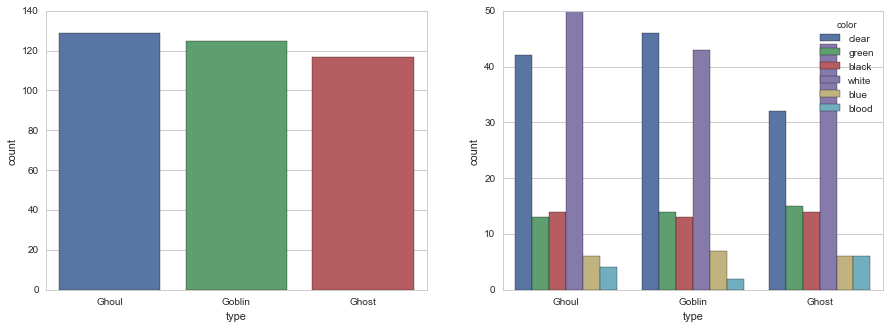

In [197]:
figure, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
sns.countplot(x = 'type', data = train_DF, ax = ax1)
sns.countplot(x = 'type', hue = 'color', data = train_DF, ax = ax2)

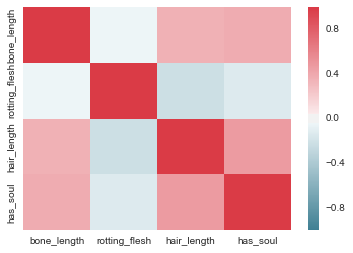

In [198]:
corr = train_DF.corr()
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap)

In [199]:
# Create some new feature to make classes more distinct

train_DF['hair_soul'] = train_DF['hair_length'] * train_DF['has_soul']
train_DF['hair_bone'] = train_DF['hair_length'] * train_DF['bone_length']
train_DF['soul_bone'] = train_DF['has_soul'] * train_DF['bone_length']

#train['hair_soul_bone'] = train['hair_length'] * train['has_soul'] * train['bone_length']

test_DF['hair_soul'] = test_DF['hair_length'] * test_DF['has_soul']
test_DF['hair_bone'] = test_DF['hair_length'] * test_DF['bone_length']
test_DF['soul_bone'] = test_DF['has_soul'] * test_DF['bone_length']

features = ["bone_length", "rotting_flesh", "hair_length", "has_soul", "hair_soul", "hair_bone", "soul_bone", "color"]
X = train_DF[features]
X = pd.get_dummies(X)
Y = train_DF["type"]
X_Test = test_DF[features]
X_Test = pd.get_dummies(X_Test)
X_Test.head()

,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,soul_bone,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0.471774,0.387937,0.706087,0.698537,0.493228,0.333114,0.329552,1.0,0.0,0.0,0.0,0.0,0.0
1,0.427332,0.645024,0.565558,0.451462,0.255328,0.241681,0.192924,0.0,0.0,0.0,0.0,0.0,1.0
2,0.549602,0.491931,0.660387,0.449809,0.297048,0.362950,0.247216,1.0,0.0,0.0,0.0,0.0,0.0
3,0.638095,0.682867,0.471409,0.356924,0.168257,0.300804,0.227752,0.0,0.0,0.0,0.0,0.0,1.0
4,0.361762,0.583997,0.377256,0.276364,0.104260,0.136477,0.099978,1.0,0.0,0.0,0.0,0.0,0.0


In [200]:
leY = LabelEncoder()
Y = leY.fit_transform(Y)

X,Xcv,Y,Ycv = train_test_split(X,Y, test_size = 0.20, random_state = 36)
print (X.shape)
print(Y.shape)
X.head()

(296, 13)
(296,)


,bone_length,rotting_flesh,hair_length,has_soul,hair_soul,hair_bone,soul_bone,color_black,color_blood,color_blue,color_clear,color_green,color_white
242,0.367799,0.637446,0.416354,0.415930,0.173174,0.153134,0.152979,0.0,0.0,0.0,1.0,0.0,0.0
204,0.272523,0.389352,0.164074,0.594088,0.097474,0.044714,0.161903,0.0,0.0,0.0,0.0,0.0,1.0
53,0.627652,0.840049,0.414816,0.488617,0.202686,0.260360,0.306682,0.0,0.0,0.0,0.0,1.0,0.0
328,0.396988,0.611109,0.507214,0.179642,0.091117,0.201358,0.071316,0.0,1.0,0.0,0.0,0.0,0.0
27,0.492438,0.623197,0.604879,0.376142,0.227520,0.297866,0.185226,0.0,0.0,0.0,0.0,1.0,0.0


In [201]:
logreg = LogisticRegression()

parameter_grid = {'solver' : ['newton-cg', 'lbfgs'],
                  'multi_class' : ['multinomial'],
                  'C' : [0.005, 0.01, 1, 10],
                  'tol': [0.0001, 0.001, 0.005, 0.01]
                 }

grid_search_logit = GridSearchCV(logreg, param_grid=parameter_grid, cv=StratifiedKFold(3))
grid_search_logit.fit(X, Y)

print('Best score: {}'.format(grid_search_logit.best_score_))
print('Best parameters: {}'.format(grid_search_logit.best_params_))

Best score: 0.6891891891891891
Best parameters: {'C': 1, 'solver': 'newton-cg', 'tol': 0.0001, 'multi_class': 'multinomial'}


In [202]:
Ycv2 = grid_search_logit.predict(Xcv)
accuracy_score(Ycv,Ycv2)

0.66666666666666663

In [203]:
import xgboost as xgb
dtrain = xgb.DMatrix(X, label = Y)
dtest = xgb.DMatrix(X_Test)

params = {"max_depth":3, "eta":0.0001, 'nthread':6, 'gamma':0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

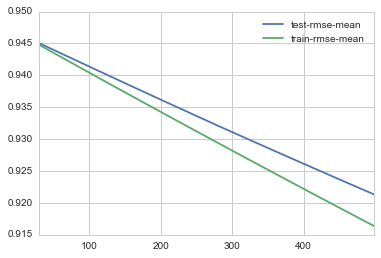

In [204]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [205]:
model = xgb.XGBClassifier(learning_rate=0.0001, n_estimators=360, max_depth=3, nthread=6, gamma=0.1)
model.fit(X,Y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0.1, learning_rate=0.0001, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=360, nthread=6,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [206]:
model.score(Xcv,Ycv)

0.69333333333333336

In [207]:
Y_pred = model.predict(X_Test)

In [208]:
pred = leY.inverse_transform(Y_pred)
pred

array(['Ghoul', 'Goblin', 'Ghoul', 'Ghost', 'Ghost', 'Ghost', 'Ghoul',
       'Goblin', 'Ghost', 'Ghoul', 'Ghost', 'Ghoul', 'Ghost', 'Ghost',
       'Ghoul', 'Ghost', 'Goblin', 'Ghost', 'Ghost', 'Ghoul', 'Goblin',
       'Goblin', 'Ghoul', 'Ghost', 'Ghoul', 'Goblin', 'Ghoul', 'Goblin',
       'Ghoul', 'Ghoul', 'Goblin', 'Ghoul', 'Ghoul', 'Goblin', 'Goblin',
       'Ghoul', 'Ghost', 'Ghoul', 'Ghost', 'Goblin', 'Ghost', 'Goblin',
       'Goblin', 'Goblin', 'Goblin', 'Ghoul', 'Ghoul', 'Goblin', 'Ghoul',
       'Ghost', 'Goblin', 'Goblin', 'Ghost', 'Goblin', 'Ghost', 'Ghost',
       'Goblin', 'Goblin', 'Ghoul', 'Ghost', 'Ghoul', 'Goblin', 'Ghost',
       'Goblin', 'Ghoul', 'Ghoul', 'Goblin', 'Goblin', 'Ghost', 'Ghoul',
       'Ghost', 'Goblin', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul',
       'Ghoul', 'Ghost', 'Goblin', 'Ghost', 'Goblin', 'Ghoul', 'Goblin',
       'Ghost', 'Ghost', 'Ghost', 'Goblin', 'Ghost', 'Ghost', 'Ghost',
       'Ghost', 'Goblin', 'Ghost', 'Ghost', 'Ghost', 'Ghost'

In [209]:
clf = MLPClassifier(solver = 'lbfgs', alpha = 0.0001, hidden_layer_sizes=(25), random_state= 1)

In [210]:
clf.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=25, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [211]:
clf.score(Xcv,Ycv)

0.76000000000000001

In [181]:
Y_pred = clf.predict(X_Test)
pred = leY.inverse_transform(Y_pred)

In [182]:
submission = pd.DataFrame({'id':indexes,
                           'type':pred})
submission.to_csv('submission.csv', index=False)

In [183]:
rg = RandomForestClassifier(n_estimators=42, max_depth=4, min_samples_split=3)

In [184]:
rg.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=42, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [185]:
rg.score(Xcv,Ycv)

0.70666666666666667

In [186]:
Y_pred = rg.predict(X_Test)
pred = leY.inverse_transform(Y_pred)

In [187]:
submission = pd.DataFrame({'id':indexes,
                           'type':pred})
submission.to_csv('submission.csv', index=False)
#Currently Known to Provide the best accuracy on Test Data

In [ ]:
#Max Accuracy Achieved by MLPClassifier: 76%